C:\Users\nilee\AppData\Local\Temp\ipykernel_20224\1267680160.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row_df.rename(index={first_row_df.index[0]: ticker}, inplace=True)


      numberOfAnalysts   avg   low  high  yearAgoEps  growth
NKE                 26  0.52  0.45  0.60        0.94  -0.447
XOM                 17  2.03  1.73  2.36        2.27  -0.106
HON                 18  2.51  2.37  2.63        2.27   0.106
AXP                 21  3.28  3.05  3.47        3.30  -0.006
AAPL                26  1.60  1.53  1.65        1.36   0.176
MSFT                30  3.10  2.96  3.17        2.73   0.136

Descriptive Statistics:
       numberOfAnalysts       avg      low      high  yearAgoEps    growth
count          6.000000  6.000000  6.00000  6.000000    6.000000  6.000000
mean          23.000000  2.173333  2.01500  2.313333    2.145000 -0.023500
std            5.138093  1.027573  0.98549  1.053540    0.868994  0.231722
min           17.000000  0.520000  0.45000  0.600000    0.940000 -0.447000
25%           18.750000  1.707500  1.58000  1.827500    1.587500 -0.081000
50%           23.500000  2.270000  2.05000  2.495000    2.270000  0.050000
75%           26.000000

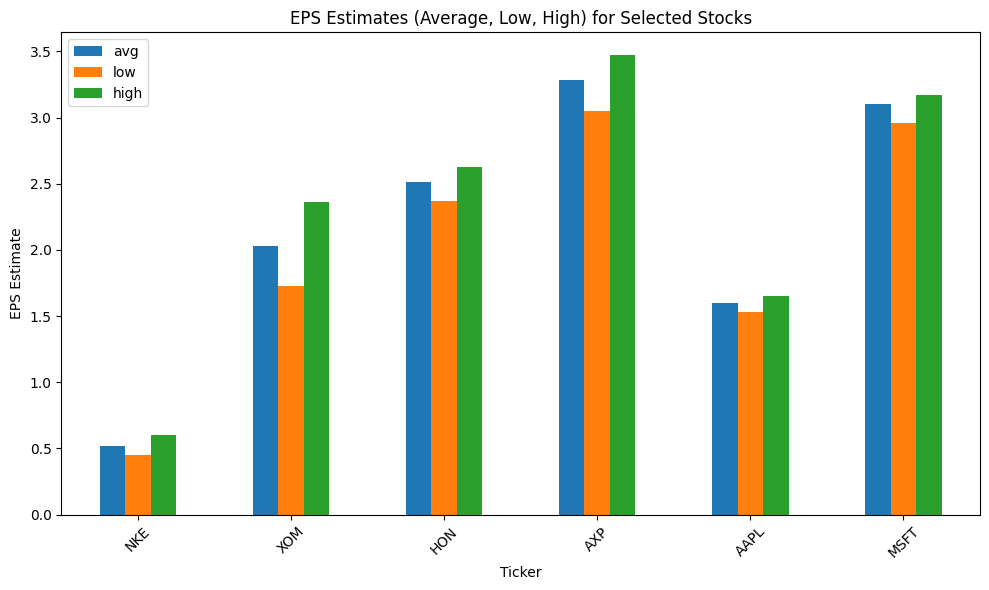

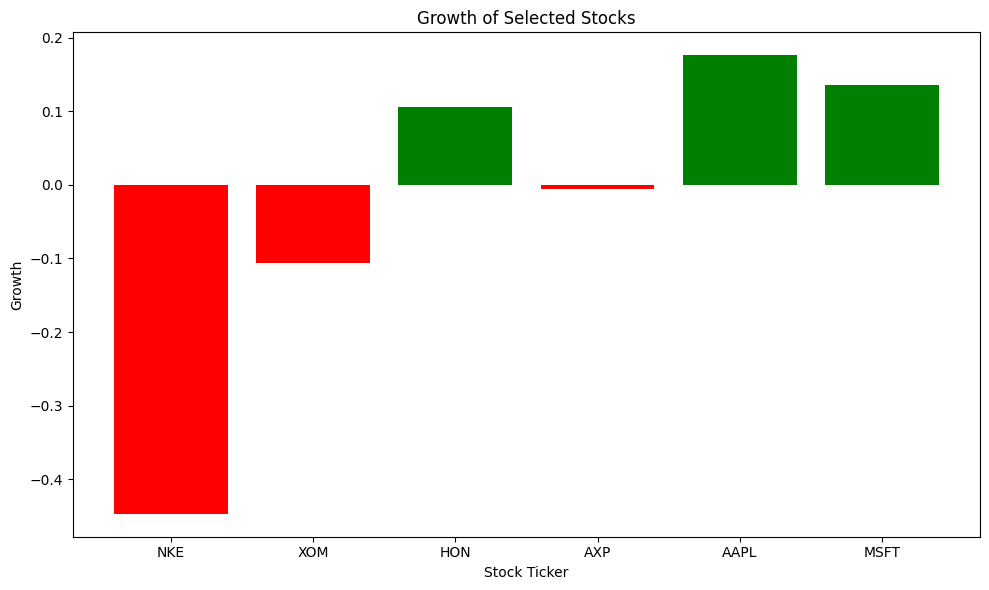

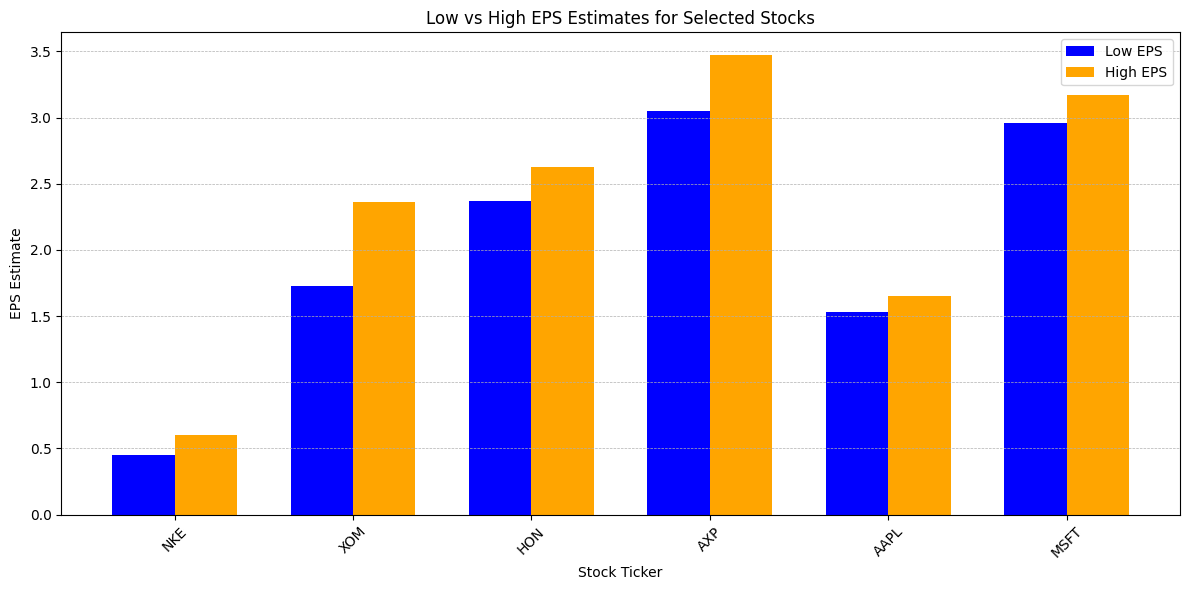


EPS Range (High - Low) for Each Company:
      eps_range
NKE        0.15
XOM        0.63
HON        0.26
AXP        0.42
AAPL       0.12
MSFT       0.21

Company with the highest EPS range: XOM (0.6299999999999999)
Company with the lowest EPS range: AAPL (0.11999999999999988)


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to get analyst data
def get_analyst_data(ticker):
    """
    Fetches the earnings estimate data for a specific stock ticker from Yahoo Finance,
    selects the first row, and renames its index.

    Args:
    ticker (str): The stock ticker symbol (e.g., 'AAPL').

    Returns:
    pd.DataFrame: A DataFrame with the first row of earnings estimate data, renamed.
    """
    # Fetch the earnings estimate for the ticker
    stock = yf.Ticker(ticker)
    earnings_estimate = stock.earnings_estimate

    # If there is no earnings estimate, return an empty DataFrame
    if earnings_estimate is None or earnings_estimate.empty:
        print(f"No earnings estimate available for {ticker}")
        return pd.DataFrame()

    # Select the first row and rename the index
    first_row_df = earnings_estimate.iloc[[0]]
    first_row_df.rename(index={first_row_df.index[0]: ticker}, inplace=True)

    return first_row_df

# Function to get multiple analyst data
def get_multiple_analyst_data(tickers):
    """
    Fetches the earnings estimate data for multiple stock tickers.

    Args:
    tickers (list of str): List of stock ticker symbols.

    Returns:
    pd.DataFrame: A concatenated DataFrame with earnings estimate data for all given tickers.
    """
    all_data = []
    for ticker in tickers:
        data = get_analyst_data(ticker)
        if not data.empty:
            all_data.append(data)
    
    if all_data:
        combined_df = pd.concat(all_data)
    else:
        combined_df = pd.DataFrame()
    
    return combined_df

# List of tickers for analysis
tickers = ["NKE", "XOM", "HON", "AXP", "AAPL", "MSFT"]

# Fetch the data for multiple tickers
combined_df = get_multiple_analyst_data(tickers)

# Display the combined DataFrame
print(combined_df)

# Additional Analysis
if not combined_df.empty:
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(combined_df.describe())

    # Visualization - Bar chart for EPS estimates
    combined_df[['avg', 'low', 'high']].plot(kind='bar', figsize=(10, 6))
    plt.title('EPS Estimates (Average, Low, High) for Selected Stocks')
    plt.xlabel('Ticker')
    plt.ylabel('EPS Estimate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plotting growth
    colors = ['green' if value > 0 else 'red' for value in combined_df['growth']]
    plt.figure(figsize=(10, 6))
    plt.bar(combined_df.index, combined_df['growth'], color=colors)
    plt.title('Growth of Selected Stocks')
    plt.xlabel('Stock Ticker')
    plt.ylabel('Growth')
    plt.tight_layout()
    plt.show()

    # EPS Range Analysis
    combined_df['eps_range'] = combined_df['high'] - combined_df['low']

    # Plotting low vs high EPS for each stock
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    indices = range(len(combined_df))

    plt.bar(indices, combined_df['low'], width=bar_width, label='Low EPS', color='blue')
    plt.bar([i + bar_width for i in indices], combined_df['high'], width=bar_width, label='High EPS', color='orange')

    # Set plot titles and labels
    plt.title('Low vs High EPS Estimates for Selected Stocks')
    plt.xlabel('Stock Ticker')
    plt.ylabel('EPS Estimate')
    plt.xticks([i + bar_width / 2 for i in indices], combined_df.index, rotation=45)
    plt.legend()

    # Add grid for readability
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Analysis of EPS Range
    print("\nEPS Range (High - Low) for Each Company:")
    print(combined_df[['eps_range']])

    # Identify company with the highest and lowest EPS range
    max_range_ticker = combined_df['eps_range'].idxmax()
    min_range_ticker = combined_df['eps_range'].idxmin()

    print(f"\nCompany with the highest EPS range: {max_range_ticker} ({combined_df.loc[max_range_ticker, 'eps_range']})")
    print(f"Company with the lowest EPS range: {min_range_ticker} ({combined_df.loc[min_range_ticker, 'eps_range']})")
